# Customer Classification using K-Nearest Neighbors

A Telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

## Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

Total customers in each category:
- 281 Plus Service 
- 266 Basic Service
- 236 Total Service
- 217  E-Service

## Feature Set

In [4]:
x = df.drop('custcat',axis=1)
x = x.values #convert to numpy array
x[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [5]:
y = df['custcat'].values #convert to numpy array
y[0:5]

array([1, 4, 3, 1, 3])

## Normalize Data

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
x = StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

## Train/Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


## Classification using K-Nearest Neighbors

In [10]:
Ks = 10
mean_acc = []
for n in range (1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n ).fit(x_train, y_train)
    yhat = neigh.predict(x_test)
    mean_acc.append(metrics.accuracy_score(y_test, yhat))

mean_acc

[0.3, 0.29, 0.315, 0.32, 0.315, 0.31, 0.335, 0.325, 0.34]

### Plot accuracy for Different Number of Ks

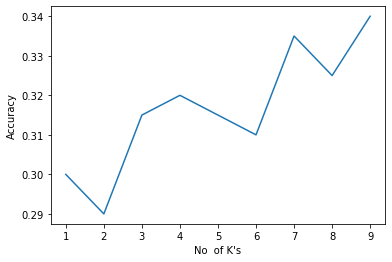

In [11]:
plt.plot(range(1,Ks),mean_acc)
plt.xlabel('No  of K\'s')
plt.ylabel('Accuracy')
plt.show()

In [12]:
print("Best accuracy was {} with k= {}".format(max(mean_acc),
                                               max(i+1 for i,_ in enumerate(mean_acc)))) #alternate for max k:mean_acc.index(max(mean_acc))+1

Best accuracy was 0.34 with k= 9


# Predicting for best K

Now let's predict value with best k i.e k=9

In [13]:
neigh = KNeighborsClassifier(n_neighbors=9).fit(x_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [14]:
#predict
yhat = neigh.predict(x_test)
yhat[0:5]

array([3, 1, 3, 2, 4])

In [15]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5025
Test set Accuracy:  0.34
